In [1]:
# 전국 인구조사 자료 정리하기 - 통계청 작성 전국 인구조사 데이터
# 시별 도별 인구수
# Data 불러오기
# 인구수에 "," 가 있어 문자열로 불러오기 stringsAsFactors = F
df <- read.csv('./rggagi/example_population.csv', stringsAsFactors = F)

In [2]:
# 자료 요약 살펴보기
str(df)


'data.frame':	281 obs. of  7 variables:
 $ City      : chr  "서울특별시  (1100000000)" "서울특별시 종로구 (1111000000)" "서울특별시 중구 (1114000000)" "서울특별시 용산구 (1117000000)" ...
 $ Population: chr  "10,078,850" "155,695" "126,817" "235,186" ...
 $ Households: chr  "4,197,478" "72,882" "59,614" "108,138" ...
 $ PersInHou : num  2.4 2.14 2.13 2.17 2.35 2.28 2.26 2.36 2.41 2.36 ...
 $ Male      : chr  "4,962,774" "76,962" "63,292" "114,119" ...
 $ Female    : chr  "5,116,076" "78,733" "63,525" "121,067" ...
 $ SexRatio  : num  0.97 0.98 1 0.94 0.99 0.97 1.01 1 0.96 0.97 ...


In [3]:
# 자료 값 확인 head()
head(df)


,City,Population,Households,PersInHou,Male,Female,SexRatio
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,서울특별시 (1100000000),"10,078,850","4,197,478",2.40,"4,962,774","5,116,076",0.97
2,서울특별시 종로구 (1111000000),"155,695","72,882",2.14,"76,962","78,733",0.98
3,서울특별시 중구 (1114000000),"126,817","59,614",2.13,"63,292","63,525",1.00
4,서울특별시 용산구 (1117000000),"235,186","108,138",2.17,"114,119","121,067",0.94
5,서울특별시 성동구 (1120000000),"298,145","126,915",2.35,"148,265","149,880",0.99
6,서울특별시 광진구 (1121500000),"362,197","158,769",2.28,"177,946","184,251",0.97


In [4]:
# 서울특별시 종로구 (1111000000) => 서울특별시 종로구 이렇게 만들기
# 문자열 분리 - str_split_fixed() 
install.packages('stringr')

package 'stringr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\NOTEBOOK\AppData\Local\Temp\RtmpsfKvU2\downloaded_packages


In [5]:
library('stringr')

In [6]:
# ( 기준으로 2개 분리
temp <- str_split_fixed(df[,1], '\\(', 2)
head(temp)


서울특별시,1100000000)
서울특별시 종로구,1111000000)
서울특별시 중구,1114000000)
서울특별시 용산구,1117000000)
서울특별시 성동구,1120000000)
서울특별시 광진구,1121500000)


In [8]:
# 공백 기준으로 시 구 분리 => 분리해야 더 다양한 분석 가능
new_city <- str_split_fixed(temp[,1], ' ',2)
head(new_city)

서울특별시,
서울특별시,종로구
서울특별시,중구
서울특별시,용산구
서울특별시,성동구
서울특별시,광진구


In [9]:
# 변수명 변경
colnames(new_city) <- c('Provinces', 'City')
head(new_city)

Provinces,City
서울특별시,
서울특별시,종로구
서울특별시,중구
서울특별시,용산구
서울특별시,성동구
서울특별시,광진구


In [10]:
# 새오운 dataframe 생성
df_new  <- data.frame(new_city, df[,c(2:7)])
df_new[df_new$Provinces == '세종특별자치시',]


,Provinces,City,Population,Households,PersInHou,Male,Female,SexRatio
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
82,세종특별자치시,,"185,212","72,733",2.55,"93,058","92,154",1.01
83,세종특별자치시,,"185,212","72,733",2.55,"93,058","92,154",1.01


In [11]:
# City 공백 => NA
df_new[df_new == " "] <- NA
head(df_new)
df_new[df_new$Provinces == '세종특별자치시',]


,Provinces,City,Population,Households,PersInHou,Male,Female,SexRatio
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,서울특별시,NA,"10,078,850","4,197,478",2.40,"4,962,774","5,116,076",0.97
2,서울특별시,종로구,"155,695","72,882",2.14,"76,962","78,733",0.98
3,서울특별시,중구,"126,817","59,614",2.13,"63,292","63,525",1.00
4,서울특별시,용산구,"235,186","108,138",2.17,"114,119","121,067",0.94
5,서울특별시,성동구,"298,145","126,915",2.35,"148,265","149,880",0.99
6,서울특별시,광진구,"362,197","158,769",2.28,"177,946","184,251",0.97


,Provinces,City,Population,Households,PersInHou,Male,Female,SexRatio
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
82,세종특별자치시,NA,"185,212","72,733",2.55,"93,058","92,154",1.01
83,세종특별자치시,NA,"185,212","72,733",2.55,"93,058","92,154",1.01


In [12]:
# NA행 삭제 - complete.cases() NA 가 있는 행 FALSE
df_new2 <- df_new[complete.cases(df_new),]
head(df_new2)
df_new2[df_new2$Provinces == '세종특별자치시',]

,Provinces,City,Population,Households,PersInHou,Male,Female,SexRatio
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
2,서울특별시,종로구,"155,695","72,882",2.14,"76,962","78,733",0.98
3,서울특별시,중구,"126,817","59,614",2.13,"63,292","63,525",1.00
4,서울특별시,용산구,"235,186","108,138",2.17,"114,119","121,067",0.94
5,서울특별시,성동구,"298,145","126,915",2.35,"148,265","149,880",0.99
6,서울특별시,광진구,"362,197","158,769",2.28,"177,946","184,251",0.97
7,서울특별시,동대문구,"362,604","160,110",2.26,"181,825","180,779",1.01


Provinces,City,Population,Households,PersInHou,Male,Female,SexRatio
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>


In [13]:
head(complete.cases(df_new))


[1] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE

In [14]:
# is.na() NA 가 있는 값 TRUE
head(is.na(df_new))


Provinces,City,Population,Households,PersInHou,Male,Female,SexRatio
FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [15]:
# NA 가 있는 행 불러오기
df_new3 <- df_new[is.na(df_new$City),]
df_new3


,Provinces,City,Population,Households,PersInHou,Male,Female,SexRatio
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,서울특별시,NA,"10,078,850","4,197,478",2.40,"4,962,774","5,116,076",0.97
27,부산광역시,NA,"3,517,491","1,430,441",2.46,"1,737,975","1,779,516",0.98
44,대구광역시,NA,"2,491,137","977,714",2.55,"1,239,275","1,251,862",0.99
53,인천광역시,NA,"2,914,271","1,145,232",2.54,"1,464,320","1,449,951",1.01
64,광주광역시,NA,"1,476,974","577,941",2.56,"731,808","745,166",0.98
70,대전광역시,NA,"1,525,656","595,216",2.56,"763,262","762,394",1.00
76,울산광역시,NA,"1,169,768","447,229",2.62,"602,945","566,823",1.06
82,세종특별자치시,NA,"185,212","72,733",2.55,"93,058","92,154",1.01
83,세종특별자치시,NA,"185,212","72,733",2.55,"93,058","92,154",1.01


In [16]:
df_new4 <- df_new[!complete.cases(df_new),]
head(df_new4)


,Provinces,City,Population,Households,PersInHou,Male,Female,SexRatio
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,서울특별시,NA,"10,078,850","4,197,478",2.40,"4,962,774","5,116,076",0.97
27,부산광역시,NA,"3,517,491","1,430,441",2.46,"1,737,975","1,779,516",0.98
44,대구광역시,NA,"2,491,137","977,714",2.55,"1,239,275","1,251,862",0.99
53,인천광역시,NA,"2,914,271","1,145,232",2.54,"1,464,320","1,449,951",1.01
64,광주광역시,NA,"1,476,974","577,941",2.56,"731,808","745,166",0.98
70,대전광역시,NA,"1,525,656","595,216",2.56,"763,262","762,394",1.00


In [17]:
# 인구수 변수 "," 처리하고 수치형으로 변환
str(df_new2)


'data.frame':	263 obs. of  8 variables:
 $ Provinces : chr  "서울특별시" "서울특별시" "서울특별시" "서울특별시" ...
 $ City      : chr  "종로구 " "중구 " "용산구 " "성동구 " ...
 $ Population: chr  "155,695" "126,817" "235,186" "298,145" ...
 $ Households: chr  "72,882" "59,614" "108,138" "126,915" ...
 $ PersInHou : num  2.14 2.13 2.17 2.35 2.28 2.26 2.36 2.41 2.36 2.57 ...
 $ Male      : chr  "76,962" "63,292" "114,119" "148,265" ...
 $ Female    : chr  "78,733" "63,525" "121,067" "149,880" ...
 $ SexRatio  : num  0.98 1 0.94 0.99 0.97 1.01 1 0.96 0.97 0.97 ...


In [18]:
for(i in 3:8){
    df_new2[,i] <- sapply(df_new2[,i], function(x) gsub(',','',x))
    df_new2[,i] <- as.numeric(df_new2[,i])
}
df_fin <- df_new2

In [19]:
head(df_fin)


,Provinces,City,Population,Households,PersInHou,Male,Female,SexRatio
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,서울특별시,종로구,155695,72882,2.14,76962,78733,0.98
3,서울특별시,중구,126817,59614,2.13,63292,63525,1.00
4,서울특별시,용산구,235186,108138,2.17,114119,121067,0.94
5,서울특별시,성동구,298145,126915,2.35,148265,149880,0.99
6,서울특별시,광진구,362197,158769,2.28,177946,184251,0.97
7,서울특별시,동대문구,362604,160110,2.26,181825,180779,1.01


In [22]:
# 그룹혈로 동일한 함수 적용 - tapply(적용할변수, 그룹지을변수, 적욜할함수)
# tapply(heigh, sex, mean) - 성별로 키갑 평균
# 도(첫번재 변수)별 인구수 합계
sum_pop <- tapply(df_fin$Population, df_fin$Provinces, sum)
print(sum_pop)
sum_pop

        강원도         경기도       경상남도       경상북도     광주광역시 
       1547166       18723822        4428762        3215695        1476974 
    대구광역시     대전광역시     부산광역시     서울특별시     울산광역시 
       2491137        1525656        3517491       10078850        1169768 
    인천광역시       전라남도       전라북도 제주특별자치도       충청남도 
       2914271        1902638        2523806         615250        2671383 
      충청북도 
       2414568 


강원도         경기도       경상남도       경상북도     광주광역시 
       1547166       18723822        4428762        3215695        1476974 
    대구광역시     대전광역시     부산광역시     서울특별시     울산광역시 
       2491137        1525656        3517491       10078850        1169768 
    인천광역시       전라남도       전라북도 제주특별자치도       충청남도 
       2914271        1902638        2523806         615250        2671383 
      충청북도 
       2414568

In [23]:
# Level 값이 남아있어 나온 세종특별자치시 삭제
df_fin[,1] <- factor(df_fin[,1]) # 갑이 없는 Levle 삭제 됨
sum_pop <- tapply(df_fin$Population, df_fin$Provinces, sum)
sum_pop

강원도         경기도       경상남도       경상북도     광주광역시 
       1547166       18723822        4428762        3215695        1476974 
    대구광역시     대전광역시     부산광역시     서울특별시     울산광역시 
       2491137        1525656        3517491       10078850        1169768 
    인천광역시       전라남도       전라북도 제주특별자치도       충청남도 
       2914271        1902638        2523806         615250        2671383 
      충청북도 
       2414568

In [24]:
# 시각화 - ggplot()
library('ggplot2')
library('ggthemes')


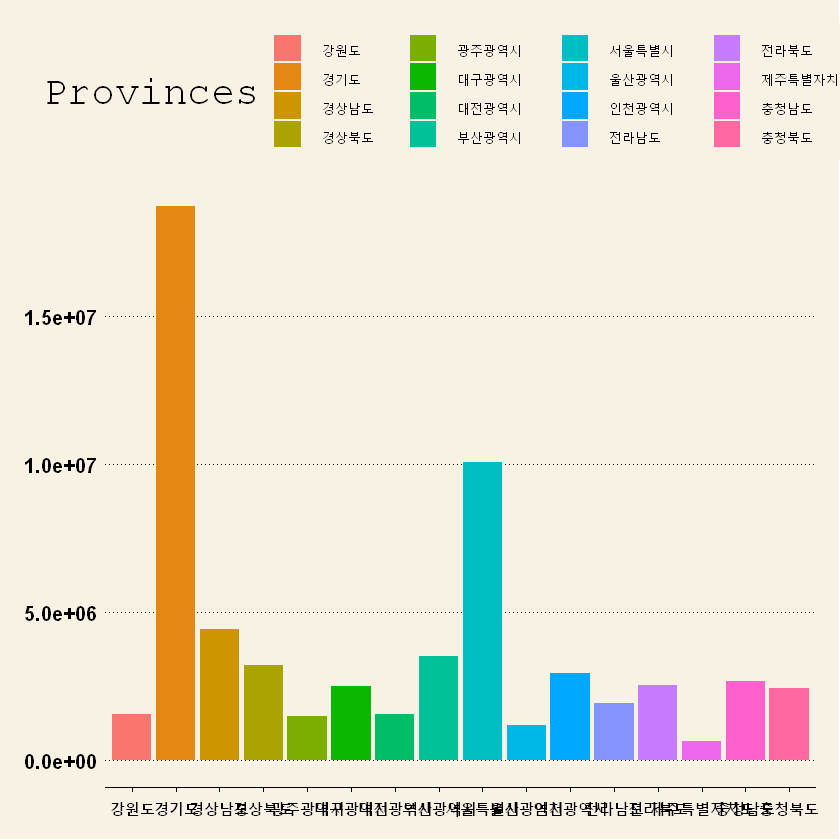

In [25]:
ggplot(df_fin, aes(x=Provinces, y=Population, fill=Provinces)) +
geom_bar(stat='identity') + 
theme_wsj()


In [26]:
# csv로 저장하기
write.csv(df_fin, 'example_population_f.csv')